# Distribuciones en forma de anillo

In [1]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

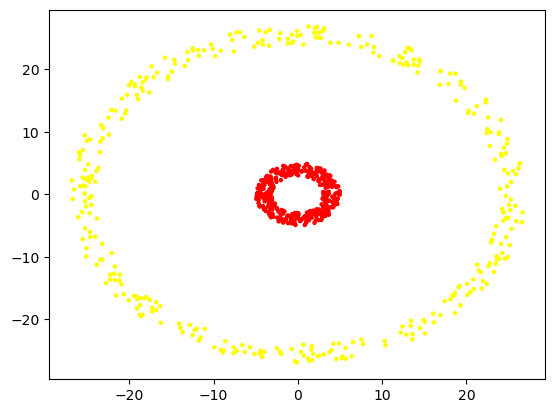

In [3]:
data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))], [1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")

# Algoritmo con Kmeans

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(2).fit(data)

/Users/juangabriel/anaconda3/envs/python-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
clust = km.predict(data)

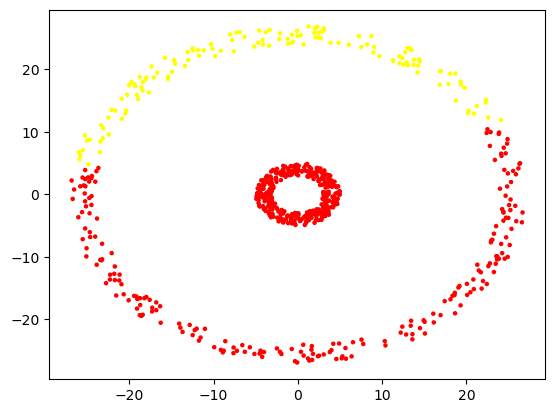

In [7]:
plt.scatter(data[:,0], data[:, 1], c = clust, s = 5, cmap="autumn")

# Algoritmo de los K Medoides

In [10]:
import sys
!{sys.executable} -m pip install pyclust
!{sys.executable} -m pip install treelib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyclust: filename=pyclust-0.2.0-py3-none-any.whl size=12804 sha256=4aaad1aa64c331fcfec9f371f46a737b9826dd4d43ce3a191ee3b27b92ed5da3
  Stored in directory: /Users/juangabriel/Library/Caches/pip/wheels/83/ce/51/f9983b113c30d8bffddf655b67e3a1084501aeb94a4021652f
Successfully built pyclust


In [13]:
# En Anaconda Prompt se debe colocar pip install pyclust
# En Anaconda Prompt se debe colocar pip install treelib
from pyclust import KMedoids

In [14]:
kmed = KMedoids(2).fit_predict(data)

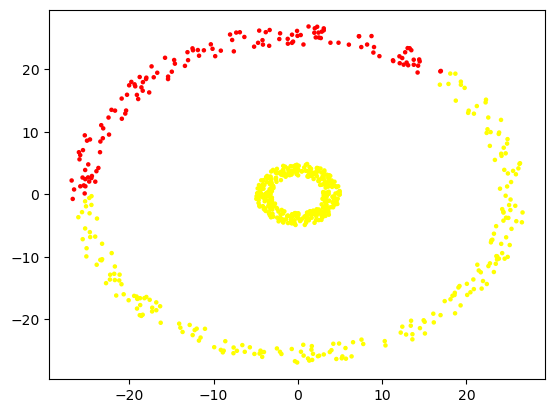

In [15]:
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="autumn")

# Algoritmo del Clustering Espectral

In [16]:
from sklearn.cluster import SpectralClustering

In [17]:
clust = SpectralClustering(2).fit_predict(data)

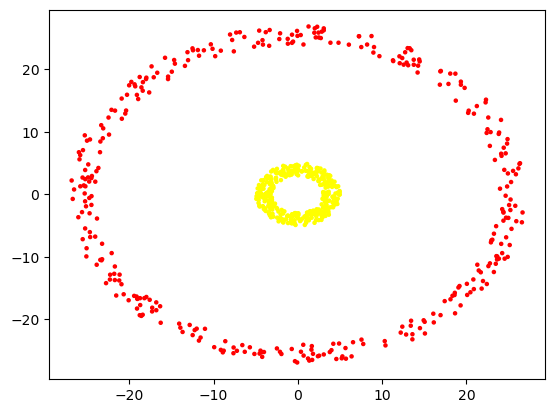

In [18]:
plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap = "autumn")

* Podemos estimar la k:
    * No: Propagación de la afinidad
    * Si: Podemos usar la distancia Euclídea:
        * Si: K-Means
        * No: Buscar valores centrales:
            * Si: K-Medoides 
            * No: Los datos son linealmente separables:
                * Si: Clustering aglomerativo
                * No: Clustering Espectral